### Задание 
Во вкладке Files в группе Webinars прикреплен файл _olimpicmedals.csv с данными о медалях на Олимпийских играх за 1896-2008 годы.
Ссылка: https://epam.sharepoint.com/sites/EPAMNNPythonLab/Shared%20Documents/Webinars/olimpic_medals.csv (https://epam.sharepoint.com/sites/EPAMNNPythonLab/Shared%20Documents/Webinars/olimpic_medals.csv) 

Скачайте .csv файл себе на диск, загрузите данные в DataFrame (функция _readcsv) и ответьте на следующие вопросы, используя функционал pandas:
1. Сколько медалей выиграл Jesse Owens в 1936? 
2. Какая страна выйграла большинство золотых медалей мужчинами в бадминтоне? 
3. Какие три страны выйграли большинство медалей в последние годы (с 1984 по 2008)? 
4. Покажите мужчин золотых медалистов по 100m. Выведите результаты по убыванию года выйгрыша. Покажите город в котором проходила олимпиала, год, имя атлета и страну за которую он выступал. 
5. Как много медалей было выйграно мужчинами и женщинами в истории олимпиады. Как много золотых, серебрянных и бронзовых медалей было выйграно каждым полом? 
6. Используя groupby(), постройте график числа всех медалей выйгранных на каждой олимпиаде. 
7. Создайте список показывающий число всех медалей выйгранных каждой страной в течение всей истории олимпийских игр. Для каждой страны, необходимо показать год первой и последней заработанной медали. 
8. Атлеты выйгравшие медали в Beijing на дистанции 100m или 200m 
9. Постройте график числа золотых медалей выйгранных США мужчинами и женщинами в атлетике. 
10. Постройте график 5 атлетов которые выйграли большинство золотых медалей. 
11. Покажите суммарное количество медалей выйгранных странами в последних олимпийских играх. 
12. Постройте таблицу в которой по годам всех олимпиад покажите топовых атлетов США(1 атлет на год) по общему количеству медалей. Включите дисциплину атлета.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data_from_file = pd.read_csv('olimpic_medals.csv', delimiter=',')

In [2]:
# 1. Сколько медалей выиграл Jesse Owens в 1936? 

medals_jesse_owens = data_from_file[(data_from_file.Athlete == 'OWENS, Jesse')
                                    & (data_from_file.Edition == 1936)].Medal.count()

medals_jesse_owens

# ОТВЕТ: 4

4

In [3]:
# 2. Какая страна выйграла большинство золотых медалей мужчинами в бадминтоне?

gold_medals_badminton_men = data_from_file[(data_from_file.Discipline == 'Badminton')
                                           & (data_from_file.Event_gender == 'M')
                                           & (data_from_file.Medal == 'Gold')]

gold_medals_badminton_men = gold_medals_badminton_men.groupby(['NOC'])['Medal'].count()
max_medals = gold_medals_badminton_men.max()
res = gold_medals_badminton_men[gold_medals_badminton_men == max_medals]
res

# ОТВЕТ: страна INA (8 медалей)

NOC
INA    8
Name: Medal, dtype: int64

In [4]:
# 3. Какие три страны выйграли большинство медалей в последние годы (с 1984 по 2008)? 

last_years = data_from_file[(data_from_file.Edition >= 1984)
                                           & (data_from_file.Edition <= 2008)]
medals = last_years.groupby(['NOC'])['Medal'].count()
medals.sort_values(ascending=False).head(3)

# ОТВЕТ:
# USA    1837
# AUS     762
# GER     691

NOC
USA    1837
AUS     762
GER     691
Name: Medal, dtype: int64

In [5]:
# 4. Покажите мужчин золотых медалистов по 100m. Выведите результаты по убыванию года выйгрыша.
#    Покажите город в котором проходила олимпиала, год, имя атлета и страну за которую он выступал. 

event_100m = data_from_file[data_from_file.Event.str.contains("100m")]
event_gender_medal=event_100m.loc[(event_100m.Gender=='Men') & (event_100m.Medal=='Gold')]
event_gender_medal.sort_values('Edition', ascending=False)[['City','Edition','Athlete','NOC']]


,City,Edition,Athlete,NOC
27606,Beijing,2008,"POWELL, Asafa",JAM
27321,Beijing,2008,"CROCKER, Ian",USA
27212,Beijing,2008,"PEIRSOL, Aaron",USA
27218,Beijing,2008,"KITAJIMA, Kosuke",JPN
27224,Beijing,2008,"PHELPS, Michael",USA
...,...,...,...,...
671,St Louis,1904,"BRACK, Walter",GER
231,Paris,1900,"JARVIS, Francis",USA
13,Athens,1896,"BURKE, Thomas",USA
3,Athens,1896,"MALOKINIS, Ioannis",GRE


In [6]:
# 5. Как много медалей было выйграно мужчинами и женщинами в истории олимпиады.
#    Как много золотых, серебрянных и бронзовых медалей было выйграно каждым полом? 

all_medals_men_women = data_from_file['Medal'].count()
all_medals_men_women

# ОТВЕТ: 29216 - всего медалей за всю историю олимпиады

29216

In [7]:
# Выиграно медалей, разделение по мужчинам и женщинам:

data_from_file[['Gender','Medal']].groupby('Gender').agg(['count'])

# ОТВЕТ: 
# мужчинами - 21721 медалей
# женщинами - 7495 медалей

,Medal
,count
Gender,
Men,21721
Women,7495


In [8]:
#    Как много золотых, серебрянных и бронзовых медалей было выйграно каждым полом? 

data_from_file[['Gender','Medal']].groupby(['Gender','Medal']).agg({'Medal':'count'})

Medal
Gender Medal        
Men    Bronze   7175
       Gold     7365
       Silver   7181
Women  Bronze   2514
       Gold     2485
       Silver   2496

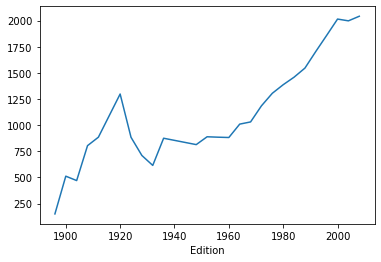

In [9]:
# 6. Используя groupby(), постройте график числа всех медалей выйгранных на каждой олимпиаде.

graph_all_medals = data_from_file.groupby(['Edition'])['Medal'].count().plot()


In [10]:
# 7. Создайте список показывающий число всех медалей выйгранных
#    каждой страной в течение всей истории олимпийских игр. 
#    Для каждой страны, необходимо показать год первой и последней заработанной медали.

all_countries_medals = data_from_file.groupby('NOC').agg({'Medal':'count','Edition':['min','max']})
all_countries_medals


Medal Edition      
    count     min   max
NOC                    
AFG     1    2008  2008
AHO     1    1988  1988
ALG    14    1984  2008
ANZ    29    1908  1912
ARG   239    1924  2008
..    ...     ...   ...
VIE     2    2000  2008
YUG   435    1924  2000
ZAM     2    1984  1996
ZIM    23    1980  2008
ZZX    48    1896  1904

[138 rows x 3 columns]

In [11]:
# 8. Атлеты выйгравшие медали в Beijing на дистанции 100m или 200m

athletes_100m_200m = data_from_file.loc[data_from_file.City=='Beijing']
athletes_100m_200m = athletes_100m_200m[athletes_100m_200m.Event.str.contains('100m|200m')]

athletes_100m_200m['Athlete'].drop_duplicates()
# ИЛИ (другой вариант удалить повторяющиеся имена)
# set(athletes_100m_200m['Athlete'].tolist())


27210       STOECKEL, Hayden
27211     VYATCHANIN, Arkady
27212         PEIRSOL, Aaron
27213          GREVERS, Matt
27214      HOELZER, Margaret
                ...         
27618    POLYAKOVA, Evgeniya
27619         BORLEE, Olivia
27620           GEVAERT, Kim
27621          MARIEN, Hanna
27622      OUEDRAOGO, Elodie
Name: Athlete, Length: 145, dtype: object

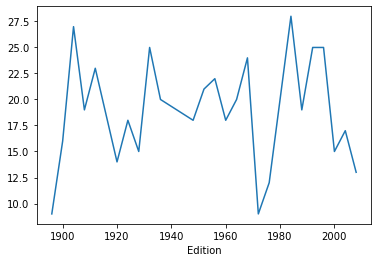

In [12]:
# 9. Постройте график числа золотых медалей выйгранных США мужчинами и женщинами в атлетике. 

# ВАРИАНТ график по годам:
gold_medals_USA = data_from_file[(data_from_file.Medal == 'Gold') &
                                 (data_from_file.NOC == 'USA') & 
                                 (data_from_file.Discipline == 'Athletics')].groupby(['Edition'])['Medal'].count().plot()


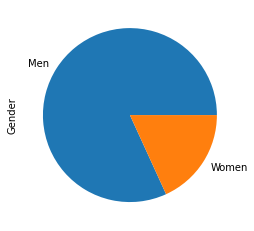

In [13]:
# ВАРИАНТ график общее распределение между мужчинами и женщинами:

data_from_file.loc[(data_from_file.NOC=='USA') &
                   (data_from_file.Sport=='Athletics')]['Gender'].value_counts().plot.pie()

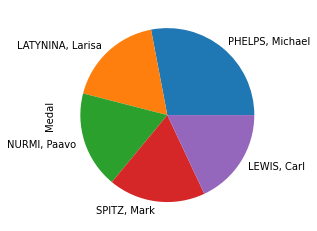

In [14]:
# 10. Постройте график 5 атлетов которые выйграли большинство золотых медалей. 

all_gold_medals = data_from_file[(data_from_file.Medal == 'Gold')]
five_athletes = all_gold_medals.groupby(['Athlete'])['Medal'].count()
five_athletes.sort_values(ascending=False).head(5).plot.pie()


In [15]:
# 11. Покажите суммарное количество медалей выйгранных странами в последних олимпийских играх. 

medals_last_game = data_from_file[data_from_file.Edition == data_from_file.Edition.max()].groupby(['NOC'])['Medal'].count()
medals_last_game


NOC
AFG      1
ALG      2
ARG     51
ARM      6
AUS    149
      ... 
USA    315
UZB      6
VEN      1
VIE      1
ZIM      4
Name: Medal, Length: 86, dtype: int64

In [16]:
# 12. Постройте таблицу в которой по годам всех олимпиад покажите топовых атлетов
#     США(1 атлет на год) по общему количеству медалей. Включите дисциплину атлета.

top_athletes_USA = data_from_file.loc[data_from_file.NOC == 'USA'].groupby(['Edition','Athlete','Sport'])['Athlete'].count()
top_athletes_USA = top_athletes_USA.sort_values(ascending=False).groupby(level=0).head(1)
top_athletes_USA.sort_index()


Edition  Athlete                      Sport     
1896     GARRETT, Robert              Athletics     4
1900     BAXTER, Irving               Athletics     5
1904     EYSER, George                Gymnastics    6
1908     SHEPPARD, Melvin             Athletics     3
1912     OSBURN, Carl Townsend        Shooting      4
1920     LEE, Willis                  Shooting      7
1924     WEISSMULLER, Johnny          Aquatics      4
1928     LAUFER, Walter               Aquatics      2
1932     DIDRIKSON, Mildred           Athletics     3
1936     OWENS, Jesse                 Athletics     4
1948     CURTIS, Ann Elisabeth        Aquatics      3
1952     KONNO, Ford Hiroshi          Aquatics      3
1956     BREEN, George Thomas         Aquatics      3
1960     VON SALTZA, Susan Christina  Aquatics      4
1964     ELLIS, Kathleen              Aquatics      4
1968     HICKCOX, Charles Buchanan    Aquatics      4
1972     SPITZ, Mark                  Aquatics      7
1976     NABER, John Phillips    